In [4]:
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([2], dtype=torch.float32, requires_grad=True)
y = 3 * x**3

In [4]:
y.backward()

In [5]:
x.grad

tensor([36.])

In [16]:
x1 = torch.tensor([4], dtype=torch.float32, requires_grad=True)
x2 = torch.tensor([2], dtype=torch.float32, requires_grad=True)

In [17]:
y = 2 * x1**2 + 3 * x2**3

In [18]:
y.backward()

In [19]:
x1.grad

tensor([16.])

In [20]:
x2.grad

tensor([36.])

In [1]:
!ls

custom_dataset.ipynb  train  train.zip


In [5]:
files = os.listdir("./train/")

In [6]:
files

['dog.8.jpg',
 'cat.27.jpg',
 'cat.21.jpg',
 'dog.42.jpg',
 'cat.100.jpg',
 'dog.54.jpg',
 'dog.114.jpg',
 'dog.103.jpg',
 'dog.74.jpg',
 'dog.69.jpg',
 'cat.117.jpg',
 'dog.96.jpg',
 'dog.105.jpg',
 'dog.24.jpg',
 'dog.80.jpg',
 'dog.82.jpg',
 'cat.76.jpg',
 'cat.35.jpg',
 'cat.48.jpg',
 'dog.18.jpg',
 'cat.13.jpg',
 'cat.33.jpg',
 'cat.110.jpg',
 'dog.108.jpg',
 'cat.99.jpg',
 'cat.25.jpg',
 'dog.86.jpg',
 'cat.72.jpg',
 'dog.36.jpg',
 'dog.39.jpg',
 'dog.120.jpg',
 'dog.64.jpg',
 'dog.19.jpg',
 'cat.86.jpg',
 'dog.57.jpg',
 'dog.1.jpg',
 'dog.31.jpg',
 'cat.5.jpg',
 'cat.44.jpg',
 'dog.56.jpg',
 'cat.116.jpg',
 'dog.110.jpg',
 'dog.51.jpg',
 'dog.113.jpg',
 'dog.109.jpg',
 'cat.42.jpg',
 'cat.68.jpg',
 'cat.49.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'cat.29.jpg',
 'dog.92.jpg',
 'cat.56.jpg',
 'cat.119.jpg',
 'dog.7.jpg',
 'cat.103.jpg',
 'cat.64.jpg',
 'cat.75.jpg',
 'cat.107.jpg',
 'dog.48.jpg',
 'dog.79.jpg',
 'dog.53.jpg',
 'cat.89.jpg',
 'cat.102.jpg',
 'dog.40.jpg',
 'dog.43.jpg',


In [8]:
cats = [file for file in files if "cat" in file]
dogs = [file for file in files if "dog" in file]

In [9]:
cats

['cat.27.jpg',
 'cat.21.jpg',
 'cat.100.jpg',
 'cat.117.jpg',
 'cat.76.jpg',
 'cat.35.jpg',
 'cat.48.jpg',
 'cat.13.jpg',
 'cat.33.jpg',
 'cat.110.jpg',
 'cat.99.jpg',
 'cat.25.jpg',
 'cat.72.jpg',
 'cat.86.jpg',
 'cat.5.jpg',
 'cat.44.jpg',
 'cat.116.jpg',
 'cat.42.jpg',
 'cat.68.jpg',
 'cat.49.jpg',
 'cat.29.jpg',
 'cat.56.jpg',
 'cat.119.jpg',
 'cat.103.jpg',
 'cat.64.jpg',
 'cat.75.jpg',
 'cat.107.jpg',
 'cat.89.jpg',
 'cat.102.jpg',
 'cat.118.jpg',
 'cat.43.jpg',
 'cat.18.jpg',
 'cat.10.jpg',
 'cat.1.jpg',
 'cat.37.jpg',
 'cat.84.jpg',
 'cat.2.jpg',
 'cat.88.jpg',
 'cat.98.jpg',
 'cat.0.jpg',
 'cat.61.jpg',
 'cat.74.jpg',
 'cat.20.jpg',
 'cat.83.jpg',
 'cat.22.jpg',
 'cat.46.jpg',
 'cat.81.jpg',
 'cat.78.jpg',
 'cat.16.jpg',
 'cat.94.jpg',
 'cat.9.jpg',
 'cat.3.jpg',
 'cat.115.jpg',
 'cat.32.jpg',
 'cat.80.jpg',
 'cat.12.jpg',
 'cat.105.jpg',
 'cat.38.jpg',
 'cat.62.jpg',
 'cat.65.jpg',
 'cat.23.jpg',
 'cat.71.jpg',
 'cat.4.jpg',
 'cat.106.jpg',
 'cat.109.jpg',
 'cat.55.jpg',
 'ca

In [10]:
dogs

['dog.8.jpg',
 'dog.42.jpg',
 'dog.54.jpg',
 'dog.114.jpg',
 'dog.103.jpg',
 'dog.74.jpg',
 'dog.69.jpg',
 'dog.96.jpg',
 'dog.105.jpg',
 'dog.24.jpg',
 'dog.80.jpg',
 'dog.82.jpg',
 'dog.18.jpg',
 'dog.108.jpg',
 'dog.86.jpg',
 'dog.36.jpg',
 'dog.39.jpg',
 'dog.120.jpg',
 'dog.64.jpg',
 'dog.19.jpg',
 'dog.57.jpg',
 'dog.1.jpg',
 'dog.31.jpg',
 'dog.56.jpg',
 'dog.110.jpg',
 'dog.51.jpg',
 'dog.113.jpg',
 'dog.109.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.92.jpg',
 'dog.7.jpg',
 'dog.48.jpg',
 'dog.79.jpg',
 'dog.53.jpg',
 'dog.40.jpg',
 'dog.43.jpg',
 'dog.93.jpg',
 'dog.12.jpg',
 'dog.111.jpg',
 'dog.81.jpg',
 'dog.119.jpg',
 'dog.66.jpg',
 'dog.20.jpg',
 'dog.94.jpg',
 'dog.30.jpg',
 'dog.60.jpg',
 'dog.15.jpg',
 'dog.9.jpg',
 'dog.101.jpg',
 'dog.23.jpg',
 'dog.58.jpg',
 'dog.104.jpg',
 'dog.25.jpg',
 'dog.11.jpg',
 'dog.62.jpg',
 'dog.29.jpg',
 'dog.6.jpg',
 'dog.63.jpg',
 'dog.5.jpg',
 'dog.90.jpg',
 'dog.61.jpg',
 'dog.73.jpg',
 'dog.112.jpg',
 'dog.65.jpg',
 'dog.107.jpg',
 'do

In [11]:
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]
)

In [12]:
class CatDogDataset(Dataset):
    def __init__(self, files, dir, transform=None):
        self.files = files
        self.dir = dir
        self.transform = transform
        if "dog" in self.files[0]:
            self.label = 1
        else:
            self.label = 0

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = os.path.join(self.dir, self.files[idx])
        img = Image.open(file_path)
        if self.transform:
            img = self.transform(img)

        return img, self.label

In [13]:
dir_path = "./train/"
cat_dataset = CatDogDataset(cats, dir_path, transform=transform)

In [14]:
dir_path = "./train/"
dog_dataset = CatDogDataset(dogs, dir_path, transform=transform)

In [15]:
cat_dog_dataset = ConcatDataset([cat_dataset, dog_dataset])

In [18]:
data_loader = DataLoader(cat_dog_dataset, batch_size=32, shuffle=True)

In [20]:
data_iter = iter(data_loader)

In [21]:
imgs, labels = next(data_iter)

In [23]:
labels

tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1])

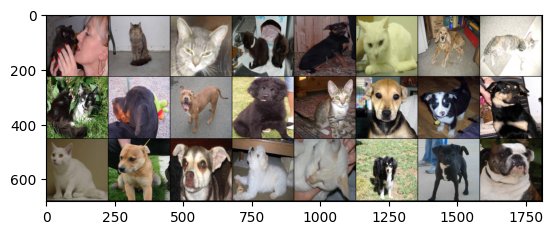

In [26]:
grid_imgs = torchvision.utils.make_grid(imgs[:24])
plt.imshow(grid_imgs.permute(1, 2, 0))